In [1]:
!pip install Biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.1 MB/s eta 0:00:00


In [2]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqIO import SeqRecord

In [38]:
Seq_a = SeqIO.read("file.fasta", "fasta")
Seq_a = Seq_a.seq

Seq_b = SeqIO.read("file.fasta", "fasta")
temp = str(Seq_b.seq).replace("A", "")
temp = temp.replace("B", "")

Seq_b = Seq(temp)

print(Seq_b)

CGAGTAACTCGTCTATCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCATACCTTGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGTGACGTGCTTGTACGTGGCTTTGGAGACTCCGTAGAGGAGGCTTTATCAGAGGCACGTCAACATCTTAAGGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGTGTTTTACCTCAACTCGAACAACCCTATGTGTTCATCAAACGTTCTGATGCTCGAACTGCACCTCATGGCCATGTCATGGTTGAATTGGTTGCAGAACTCGATGGTGTTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTACTTGTCCCCCATGTGGGTGAGGTACCAGTTGCTTACCGTAAAGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCTTTTGACTTAGGCGACGAGCTTGGAACTGATCCTATTGAAGATTTTCAAGAAAATTGGAACACTAAACATGGCAGTGGTGTTACCCGTGAACTCAAGCGTGAGCTCAACGGGGGTGCATATACTCGCTATGTAGACAACAACTTTTGTGGCCCAGATGGCTACCCCCTTGAGTGCATTAAAGACCTTCTGGCTCGTGCTGGTAAGGCTTCTTATGCTTTGTCTGAACAATTGGATTTTATTGACACTAAGAGAGGTGTTTACTGCTGCCGTGGACACGAGCATGAAATTGCTTGGTACACGGAACGCTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAGTTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAGTTTTGTATTTCCTCTAAATTCAACAATCAAGACCATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGTTTCATGGGCAGAA

In [21]:
# 1
# a
print(len(Seq_a))
print(len(Seq_b))

# b
print(Seq_a.find("ABC"))
print(Seq_b.find("DEF"))

# c
Seq_c = Seq_a[:2:] + Seq_b[3::-1]
print(Seq_c)

29274
29083
117
512
TAAAAGTCAATGAGC


In [22]:
from Bio.SeqUtils import MeltingTemp as mt

In [30]:
# 2
# a
print(mt.Tm_Wallace(Seq_a))
print(mt.Tm_Wallace(Seq_b))
print(mt.Tm_Wallace(Seq_c))

81508.0
80871.0
40.0


In [29]:
# b
def count(seq: Seq, t=""):
    seq = seq.lower()
    temp = "".join([i for i in seq if(i in t)])
    return (len(temp)/len(seq)) * 100

#Seq A
gc_percent = count(Seq_a, "gc")
at_percent = count(Seq_a, "at")
print(f"Seq A:\nGC Percentage: {gc_percent}%\nAT Percentage: {at_percent}%")

#Seq B
gc_percent = count(Seq_b, "gc")
at_percent = count(Seq_b, "at")
print(f"\nSeq B:\nGC Percentage: {gc_percent}%\nAT Percentage: {at_percent}%")

#Seq C
gc_percent = count(Seq_c, "gc")
at_percent = count(Seq_c, "at")
print(f"\nSeq C:\nGC Percentage: {gc_percent}%\nAT Percentage: {at_percent}%")

Seq A:
GC Percentage: 39.21568627450981%
AT Percentage: 60.78431372549019%

Seq B:
GC Percentage: 38.97809717016814%
AT Percentage: 60.90843448062442%

Seq C:
GC Percentage: 33.33333333333333%
AT Percentage: 66.66666666666666%


In [34]:
from Bio.SeqUtils import molecular_weight as mw

In [40]:
# c
print(mw(Seq_a))
print(mw(Seq_b))
print(mw(Seq_c))

9050161.841500323
8978271.984700456
4689.021699999999


In [43]:
from collections import Counter as count
import matplotlib.pyplot as plt

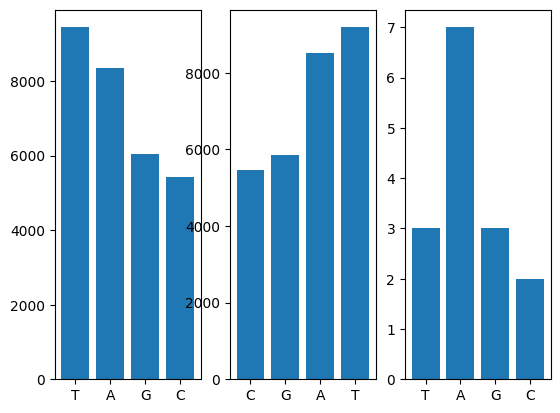

In [65]:
# d
Seq_a_compos = count(Seq_a)
Seq_b_compos = count(Seq_b)
Seq_c_compos = count(Seq_c)

# print(Seq_a_compos.keys())
# print(Seq_a_compos.values())

fig, axs = plt.subplots(1, 3)

axs[0].bar(Seq_a_compos.keys(), Seq_a_compos.values())
axs[1].bar(Seq_b_compos.keys(), Seq_b_compos.values())
axs[2].bar(Seq_c_compos.keys(), Seq_c_compos.values())
plt.show()

In [72]:
# 3
# a
Seq_a_transcribe = Seq_a.complement().transcribe()
print(Seq_a_transcribe)
Seq_b_transcribe = Seq_b.complement().transcribe()
print(Seq_b_transcribe)
Seq_c_transcribe = Seq_c.complement().transcribe()
print(Seq_c_transcribe)

# b
print("\n"+ Seq_a_transcribe.translate())
print(Seq_b_transcribe.translate())
print(Seq_c_transcribe.translate())

AUUUUCCUAAUUAGGAAGGGCCUUUUAGGAUGGUUAGAGCUAGAGAACGUCUAGACAAGAGAUUUGCUUGAAAUUUUAGACACAUGAACAGUGAACCGACAUACGGGUCACGUAAAUGCGUCAUAUUUAAUAUUAAAAAUGACAGCAACUGUCCUUUGCUCAUUGAGCAGGCAGAAGACGUCCAACGAAUGCCAAAGCAGGCACAACGUCGGCUAGUAGUCGUAUGGAUCCAAAGCAGGCCCACACUGGCUUUCCAUUCUACCUCUCGGAACAGGGACCAAAGUUGCUCUUUUGAGUGCAGGUUGAGUCAAAUGGACAAAAUGUCCAAUCGCUGCACGAUCAUGCACCUAAACCACUAUGACAACUUCUUCGAUAGUGACUUCGUGCAGUUGUAAAUUAUCUACCUUGUACACCGUAAUAGUCAGAGGUCUUCCCACAAAAUGGGGUUGACCUUGUCGGAAUACACAAGGAAUUUGCAAGACUACGGAAAUGACGUGGAGUACCGGUACAAUACCAGCUCAACCAGCGUCUUAAUUUACCGUAAGUCAUGCCAUCCUCGCCUCUUUGCGAACCACAGAAUCACGGUGUGUGCAUACUCUGUGGUUGACCAAUGGCGUUCCAAGAACAGGCAUUCUUGCCAUUAUUCCCACGACCACCGGUAACGAUGCCUCGGCUAGAUUUCAGAGGUCUGAAUCCACUGCUCGAACCGUGACUGGGAUAACUUCUAAUACUUUUGCUGACCUUGUGAUUUGUACCGUCACCUGAGUUUGCAGUCGAGAAAUCUCUCGACUUACCACCUCAAAUGUGAGCGAUACAUCUGUUGUUGAAGACACCAGGACUACCUAUAGGUAACCUGACAUAAUUUCUGAACGAACGAUCCCGGCCGUUUAGAACACGAGGUGAGAGACUGGUUUAUCUGAAAAAUGUCAGAUUCUCUCCACACAUGACAACGGCACUCGUACUCGUACUUUAUCGAACCAAGUGACUAGCGAGACUCUUC

In [74]:
from Bio import pairwise2 as pw2

In [78]:
# 4
# a
Seq_new = Seq("TCG")
# print(Seq_new)
local_alignment = pw2.align.localxx(Seq_a, Seq_new, score_only=True)
print(local_alignment)

TGTACATTATAATGCTCTATTTTCTCGC
28.0


In [79]:
# b
Seq_new = Seq("CAG")
# print(Seq_new)
local_alignment = pw2.align.localxx(Seq_b, Seq_new, score_only=True)
print(local_alignment)

CAGAGTAATGTGTACAGATATTGGGCTC
28.0


In [80]:
!pip install Levenshtein
from Levenshtein import distance as dist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.3 MB/s eta 0:00:00


In [81]:
# c
print(dist(Seq_a, Seq_b))

7357
